In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import MyDataLoader, DataPreparation

`StarObject` and `GalaxyObject` are instantiated here without noise.

In [2]:
data = DataPreparation()

In [20]:
size_df = 1
noise = 'high'
# the params are in this order:

data.sample_params_from_prior(size_df,
                              low=[1, 1, -1.5],
                              high=[10, 10, 1.5],
                              n_params=3,
                              seed=42)

In [21]:
data.params

array([[4.37086107, 9.55642876, 0.69598183]])

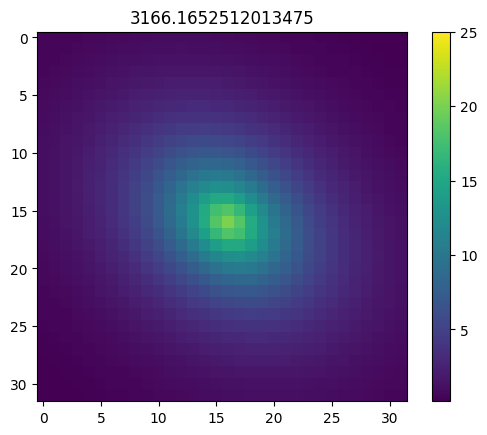

In [25]:
plot = True
image_size = 32
image_array = np.zeros((size_df, image_size, image_size))
image_noisy_array = np.zeros((size_df, image_size, image_size))
total_brightness = []
total_brightness_noisy = []
for i in range(size_df):
    image = data.simulate_data_2d(
        image_size=image_size,
        amplitude=data.params[i, 0],
        radius=data.params[i, 1],
        center_x=16,
        center_y=16,
        theta=data.params[i, 2],
        noise_level=0)
    if plot:
        #for j, k in zip(range(image_size), range(image_size)):
            #image[j, k] += np.random.normal(loc=0, scale=1, size=(3, 4))  # M
        noisy_image = image + np.random.normal(
            loc=0, scale=1, size=(image_size, image_size)) 
        plt.imshow(image, vmax=25)
        plt.colorbar()

    image_array[i, :, :] = image
    noisy_image_array[i, :, :] = noisy_image
    
    # okay for each one we need to calculate a thing,
    # total brightness
    if plot:
        plt.title(np.sum(image))
        plt.show()
    total_brightness.append(np.sum(image))
    total_brightness_noisy.append(np.sum(image_noisy))


In [19]:
np.shape(image_array)

(10, 32, 32)

In [ ]:
data = DataPreparation()